<a href="https://colab.research.google.com/github/freedom-780/FBI-Firearm-Background-Check/blob/main/Firearm_Background_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='intro'></a>
## Introduction

Gun Background Check Data

> The dataset from The National Instant Criminal Background Check System (NICS) is managed by the FBI  according to the Brady Handgun Violence Prevention Act of 1993 (Brady Act) -- fully implemented on Novemeber 30, 1998 -- and there are differences in state law in regards to requirements. Those that have valid ATF permits and for services and repair picked u by the same person don't require a background check. Data is collected with ATF Form 4473.

  Types of background checks:

* Handgun—(a) any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.
* Long Gun—a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore either a number of ball shot or a single projectile for each single pull of the trigger.
* Other(might want to drop columns or check if they are outliers)—refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.


Mass Shooting Data:

Information about mass shooting in america is from Stanford Mass Shootings in America, courtesy of the Stanford Geospatial Center and Stanford Libraries.

* Data Dictionary: https://github.com/StanfordGeospatialCenter/MSA/blob/master/Methodology/Stanford_MSA_Data_Dictionary.csv
* Github main page: https://github.com/StanfordGeospatialCenter/MSA

Questions 

* Which type of gun background check is increasing the most in general and with time?
* What number of states have the highest number of mass shooting evens and for which type of gun?
* What are the most common motives by gun type?











In [28]:
# import packages 
import pandas as pd 
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

>


### Load Data

In [29]:
# Import data from gun permits and mass shootings files from github repo

gun_data = "https://github.com/freedom-780/FBI-Firearm-Background-Check/blob/main/gun_data.xlsx?raw=true"
gun_background_check = pd.read_excel(gun_data)

standford_msa = "https://raw.githubusercontent.com/freedom-780/FBI-Firearm-Background-Check/main/Stanford_MSA_Database.csv"
mass_shootings = pd.read_csv(standford_msa)






### Drop Columns 

Disgard the columns not needs for analysis. For this analysis, the columns of the most use are the columns that deal with the number of type of guns involved in background checks.

For mass shooting: 

In [30]:
# drop columns from gun_background_check that are not needed for the analysis

gun_background_check.drop(gun_background_check.columns. \
 difference(['month', 'state', 'handgun', 'long_gun', 'other', 'multiple', \
'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'totals']), 1, inplace=True)


In [31]:
#Check to see if the right columns were dropped
gun_background_check.columns

Index(['month', 'state', 'handgun', 'long_gun', 'other', 'multiple',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'totals'],
      dtype='object')

In [32]:
# get info and see if data types are correct 
gun_background_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  12485 non-null  object 
 1   state                  12485 non-null  object 
 2   handgun                12465 non-null  float64
 3   long_gun               12466 non-null  float64
 4   other                  5500 non-null   float64
 5   multiple               12485 non-null  int64  
 6   private_sale_handgun   2750 non-null   float64
 7   private_sale_long_gun  2750 non-null   float64
 8   private_sale_other     2750 non-null   float64
 9   totals                 12485 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 975.5+ KB


From the above dtypes: month needs to be changed to datetime, and state column to category dtype

In [33]:
# Drop the columns that are not needed for mass_shooting data 
mass_shootings.drop(mass_shootings.columns \
.difference(['State','Date','Type of Gun - General','Number of Shotguns','Number of Rifles', \
'Number of Handguns','Total Number of Guns','Number of Automatic Guns','Number of Semi-Automatic Guns', \
'Possible Motive - General','History of Mental Illness - General']), 1, inplace=True)

In [34]:
# Check if the correct columns were dropped
mass_shootings.columns

Index(['State', 'Date', 'Type of Gun - General', 'Number of Shotguns',
       'Number of Rifles', 'Number of Handguns', 'Total Number of Guns',
       'Number of Automatic Guns', 'Number of Semi-Automatic Guns',
       'Possible Motive - General', 'History of Mental Illness - General'],
      dtype='object')

### Clean Mass_Shootings Data and Convert dtypes



In [35]:
#Check data types of mass shooting
mass_shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                335 non-null    object
 1   Date                                 335 non-null    object
 2   Type of Gun - General                335 non-null    object
 3   Number of Shotguns                   335 non-null    object
 4   Number of Rifles                     335 non-null    object
 5   Number of Handguns                   335 non-null    object
 6   Total Number of Guns                 335 non-null    object
 7   Number of Automatic Guns             335 non-null    object
 8   Number of Semi-Automatic Guns        335 non-null    object
 9   Possible Motive - General            333 non-null    object
 10  History of Mental Illness - General  335 non-null    object
dtypes: object(11)
memory usage: 28.9+ KB


The goal is to change the columns into the proper dtypes 

In [36]:
# Check a dictionary with desired data types to change 
mass_change_dtype = {'Number of Shotguns': 'float64', 
                     'Number of Rifles': 'float64', 
                     'Total Number of Guns': 'float64',
                     'Number of Automatic Guns': 'float64',
                     'Number of Semi-Automatic Guns': 'float64',
                     'Number of Handguns': 'float64',
                     'State':'category',
                     'Type of Gun - General':'category',
                     'Possible Motive - General':'category'
                        
                     }

In [70]:
 ''' step 1: look at the unique values in each variable
to determine what type of cleaning is required '''

def unique_values(x):
  if x in list(mass_change_dtype.keys()):
    print(mass_shootings[x].unique())







In [72]:
mass_shootings.apply(lambda x: unique_values(x))

ValueError: ignored

In [ ]:
''' step 2: find the rows in each key that require cleaning '''

# seclect only rows with a parenthesis 
mask = mass_shootings['Number of Rifles'].str.contains('\(')
mask_1 = mass_shootings['Number of Automatic Guns'].str.contains('\(')
mask_2 = mass_shootings['Number of Semi-Automatic Guns'].str.contains('\(')
mask_3 = mass_shootings['Number of Handguns'].str.contains('\(')

print(mass_shootings.loc[mask,"Number of Rifles"])
print(mass_shootings.loc[mask_1,"Number of Automatic Guns"])
print(mass_shootings.loc[mask_2,"Number of Semi-Automatic Guns"])
print(mass_shootings.loc[mask_3,"Number of Handguns"])


15    0 (1)
Name: Number of Rifles, dtype: object
15    1(0)
Name: Number of Automatic Guns, dtype: object
15    1(2)
Name: Number of Semi-Automatic Guns, dtype: object
15    2 (1)
Name: Number of Handguns, dtype: object


So, the values with parenthes are all in a single row. Now it's time to clean this row. 

In [ ]:
# clean data with ")"

# select only rows with parenthesis 
for x in list(mass_change_dtype.keys()):
  # select only rows with parenthesis
  mask_4 = mass_shootings[x].str.contains('\(')
  # make sure there are any relevant rows with a true mask value
  if mask_4.any():
    # set only rows with the issue equal to the first column
    mass_shootings.loc[mask_4, x] = mass_shootings.loc[mask_4, x].str.split('\(', expand=True).iloc[:,0].str.strip()


In [ ]:
# Check to see if the cleaning was done correctly 

for x in list(mass_change_dtype.keys()):
  print(mass_shootings[x].unique())

['1' '0' '2' 'Unknown' 'Handgun']
['3' '0' '1' '2' 'Unknown']
['7' '1' '2' '3' '6' '10' '4' '5' 'Unknown' '0']
['0' '1' '2' 'Unknown']
['1' '0' '3' '2' '4' 'Unknown']
['3' '1' '2' '0' '4' '7' '5' 'Unknown']
['Texas' 'Arizona' 'Louisiana' 'Illinois' 'New York' 'California'
 'South Carolina' 'Nevada' 'Florida' 'Washington' 'Kansas' 'Georgia'
 'Oklahoma' 'Montana' 'Kentucky' 'Iowa' 'New Jersey' 'Michigan'
 'Massachusetts' 'Utah' 'North Carolina' 'Wyoming' 'Colorado' 'Ohio'
 'Tennessee' 'Alaska' 'Mississippi' 'Wisconsin' 'Connecticut' 'Arkansas'
 'Pennsylvania' 'Oregon' 'Hawaii' 'Virginia' 'Minnesota' 'Vermont'
 'Nebraska' 'Missouri' 'Alabama' 'New Mexico' 'District of Columbia'
 'Idaho' 'West Virginia' 'Indiana' 'South Dakota' 'Maine' 'Delaware'
 'Maryland']
['Multiple guns' 'Handgun' 'Shotgun' 'Rifle' 'Multiple guns\n' 'Unknown'
 '\nMultiple guns' 'handgun' 'Multiple Guns' 'Semi-Automatic Rifle' '9-mm']
['Mental illness' 'Race' 'Expulsion/Suspension' 'Social dispute' 'Unknown'
 'Multiple

In [ ]:
# drop rows with unknown values 
mass_shootings.drop(mass_shootings[mass_shootings == 'Unknown'].index, inplace = True)
  
    
  

In [ ]:
# check to see is 'Unknown' values were cleaned
for x in list(mass_change_dtype.keys()):
  print(mass_shootings[x].unique())

['1' '0' '2']
['3' '0' '1' '2']
['7' '1' '2' '3' '6' '10' '4' '5']
['0' '1' '2']
['1' '0' '3' '2' '4']
['3' '1' '2' '0' '4' '7' '5']
['Texas' 'Arizona' 'Louisiana' 'Illinois' 'New York' 'California' 'Nevada'
 'Florida' 'South Carolina' 'Kansas' 'Georgia' 'Oklahoma' 'Montana'
 'Kentucky' 'Iowa' 'New Jersey' 'Michigan' 'Massachusetts' 'Utah'
 'North Carolina' 'Colorado' 'Washington' 'Ohio' 'Tennessee' 'Alaska'
 'Mississippi' 'Wisconsin' 'Connecticut' 'Arkansas' 'Pennsylvania'
 'Oregon' 'Hawaii' 'Virginia' 'Minnesota' 'Vermont' 'Nebraska' 'Missouri'
 'Alabama' 'New Mexico' 'District of Columbia' 'West Virginia']
['Multiple guns' 'Handgun' 'Rifle' 'Shotgun' 'Multiple guns\n']
['Mental illness' 'Race' 'Expulsion/Suspension' 'Multiple motives'
 'Social dispute' 'Harassment' 'Failure' 'Rejection'
 'Terminated/Denied/Reprimanded' 'Robbery' 'Financial dispute'
 'Political/Religious ideals' 'Legal dispute' 'Domestic dispute' 'Gender']


In [ ]:
#convert the columns in the keys to float64
mass_shootings = mass_shootings.astype(mass_change_dtype)

In [ ]:
# replace \n characters in type of Gun Column
mass_shootings['Type of Gun - General'] = mass_shootings['Type of Gun - General'].str.replace('\n','')

In [ ]:
mass_shootings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 333
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   State                                147 non-null    category
 1   Date                                 147 non-null    object  
 2   Type of Gun - General                147 non-null    object  
 3   Number of Shotguns                   147 non-null    float64 
 4   Number of Rifles                     147 non-null    float64 
 5   Number of Handguns                   147 non-null    float64 
 6   Total Number of Guns                 147 non-null    float64 
 7   Number of Automatic Guns             147 non-null    float64 
 8   Number of Semi-Automatic Guns        147 non-null    float64 
 9   Possible Motive - General            147 non-null    category
 10  History of Mental Illness - General  147 non-null    object  
dtypes: category(2), flo

In [ ]:
# print statistics about mass shootings data

print(f"Shape of mass shooting data: {mass_shootings.shape}")
print(f"Number of mission values in mass shooting data: \
{mass_shootings.isnull().sum().sum()}")
print(f"Number of duplicate values in mass shooting data: \
{mass_shootings.duplicated().sum()}")

Shape of mass shooting data: (147, 11)
Number of mission values in mass shooting data: 0
Number of duplicate values in mass shooting data: 0


In [ ]:
# print data about gun_background_check shape

print(f"Shape of gun background data: {gun_background_check.shape}")
print(f"Number of mission values in gun background data:\
{gun_background_check.isnull().sum().sum()}")
print(f"Number of duplicate values in gun background data:\
{gun_background_check.duplicated().sum()}")

Shape of gun background data: (12485, 10)
Number of mission values in gun background data:36229
Number of duplicate values in gun background data:0


So the gun_background data set is the only one that needs its null values cleaned

### Clean gun_background_check Data & Convert dtypes



In [ ]:
#Check which rows the missing values are coming from
gun_background_check.isnull().sum(0)

month                       0
state                       0
handgun                    20
long_gun                   19
other                    6985
multiple                    0
private_sale_handgun     9735
private_sale_long_gun    9735
private_sale_other       9735
totals                      0
dtype: int64

since private sales has so many null values(about 10,000 out of about 12,000), so these columns should just be dropped.

In [ ]:
# Drop the private data columns"
gun_background_check.drop(['private_sale_handgun','private_sale_long_gun','private_sale_other'], 1, inplace=True)
# Check to see if the rows were dropped
gun_background_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12466 non-null  float64
 4   other     5500 non-null   float64
 5   multiple  12485 non-null  int64  
 6   totals    12485 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 682.9+ KB


In [ ]:
gun_background_check.isnull().sum(0)

month          0
state          0
handgun       20
long_gun      19
other       6985
multiple       0
totals         0
dtype: int64

Drop the rest of the null values

In [ ]:
gun_background_check.dropna(inplace=True)

In [ ]:
# Convert month to datetime and state to cateegory

gun_background_check['month'] = pd.to_datetime(gun_background_check['month'])
gun_background_check['state'] = gun_background_check['state'].astype('category')

In [ ]:
gun_background_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500 entries, 0 to 5499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     5500 non-null   datetime64[ns]
 1   state     5500 non-null   category      
 2   handgun   5500 non-null   float64       
 3   long_gun  5500 non-null   float64       
 4   other     5500 non-null   float64       
 5   multiple  5500 non-null   int64         
 6   totals    5500 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 309.1 KB


### Convert 

Now since all three datasets are clean, it's ok to proceed to exploratory data analysis 

<a id='eda'></a>
## Exploratory Data Analysis

>The goal of this analysis overall is to explore the background check data in regards to states, times, and specific types of background checks. The exploration of the mass shooting data will explore the types of guns involved in shootings, including by state, and connections with the type of gun and motivations. 

### Which type of gun background check is increasing the most in general and with time?

In [ ]:
# get some basic stats on gun_background checks
gun_background_check.describe()

,handgun,long_gun,other,multiple,totals
count,"5,500.00","5,500.00","5,500.00","5,500.00","5,500.00"
mean,"8,874.54","8,666.89",360.47,341.19,"30,603.89"
std,"11,180.00","10,204.22","1,349.48",512.89,"43,380.59"
min,0.00,0.00,0.00,0.00,0.00
25%,"1,589.75","2,604.00",17.00,14.00,"6,804.00"
50%,"4,947.50","5,697.00",121.00,172.00,"17,624.00"
75%,"11,777.00","11,565.25",354.00,447.00,"36,419.50"
max,"107,224.00","108,058.00","77,929.00","6,582.00","541,978.00"


(0.0, 20000.0)

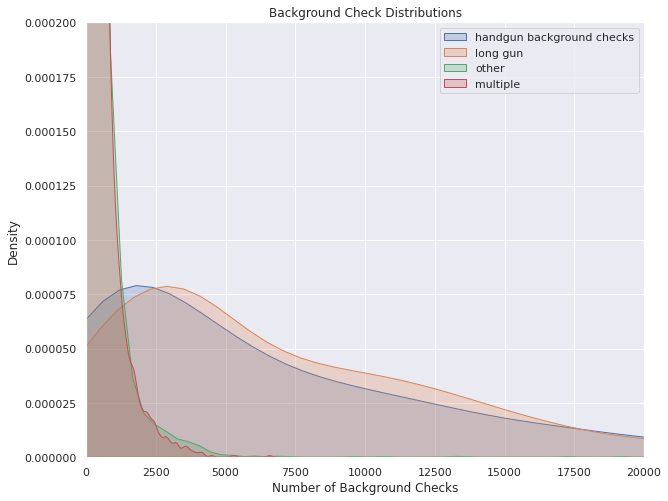

In [ ]:
# plot distributions of the various types of background checks
sns.set(rc={'figure.figsize':(10,8)})
sns.kdeplot(gun_background_check['handgun'], label='handgun background checks', shade= True);
sns.kdeplot(gun_background_check['long_gun'], label='long gun', shade= True)
sns.kdeplot(gun_background_check['other'], label='other',shade= True)
sns.kdeplot(gun_background_check['multiple'], label='multiple',shade= True)
plt.legend()
plt.xlabel('Number of Background Checks')
plt.title("Background Check Distributions")
plt.ylim(0,.0002)
plt.xlim(0,20000)




From the graph, the  multiple and other background check categories are close to zero while handgun and longgun are similar in distributions, but need to explore how these values vary for different times and states 

In [ ]:
# Use rolling average to smooth out the graph below for handguns 
gun_background_check['7year_rolling_avg_handgun'] = gun_background_check.handgun.rolling(7).mean() 

In [ ]:
# Use rolling average to smooth out the graph below for longguns  
gun_background_check['7year_rolling_avg_longgun'] = gun_background_check.long_gun.rolling(7).mean() 

In [ ]:
# check to see if rolling_avg columns were added to the Dataframe
gun_background_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500 entries, 0 to 5499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      5500 non-null   datetime64[ns]
 1   state                      5500 non-null   category      
 2   handgun                    5500 non-null   float64       
 3   long_gun                   5500 non-null   float64       
 4   other                      5500 non-null   float64       
 5   multiple                   5500 non-null   int64         
 6   totals                     5500 non-null   int64         
 7   7year_rolling_avg_handgun  5494 non-null   float64       
 8   7year_rolling_avg_longgun  5494 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(2)
memory usage: 395.0 KB


Text(0.5, 1.0, 'Line Chart of Background Checks by gun type')

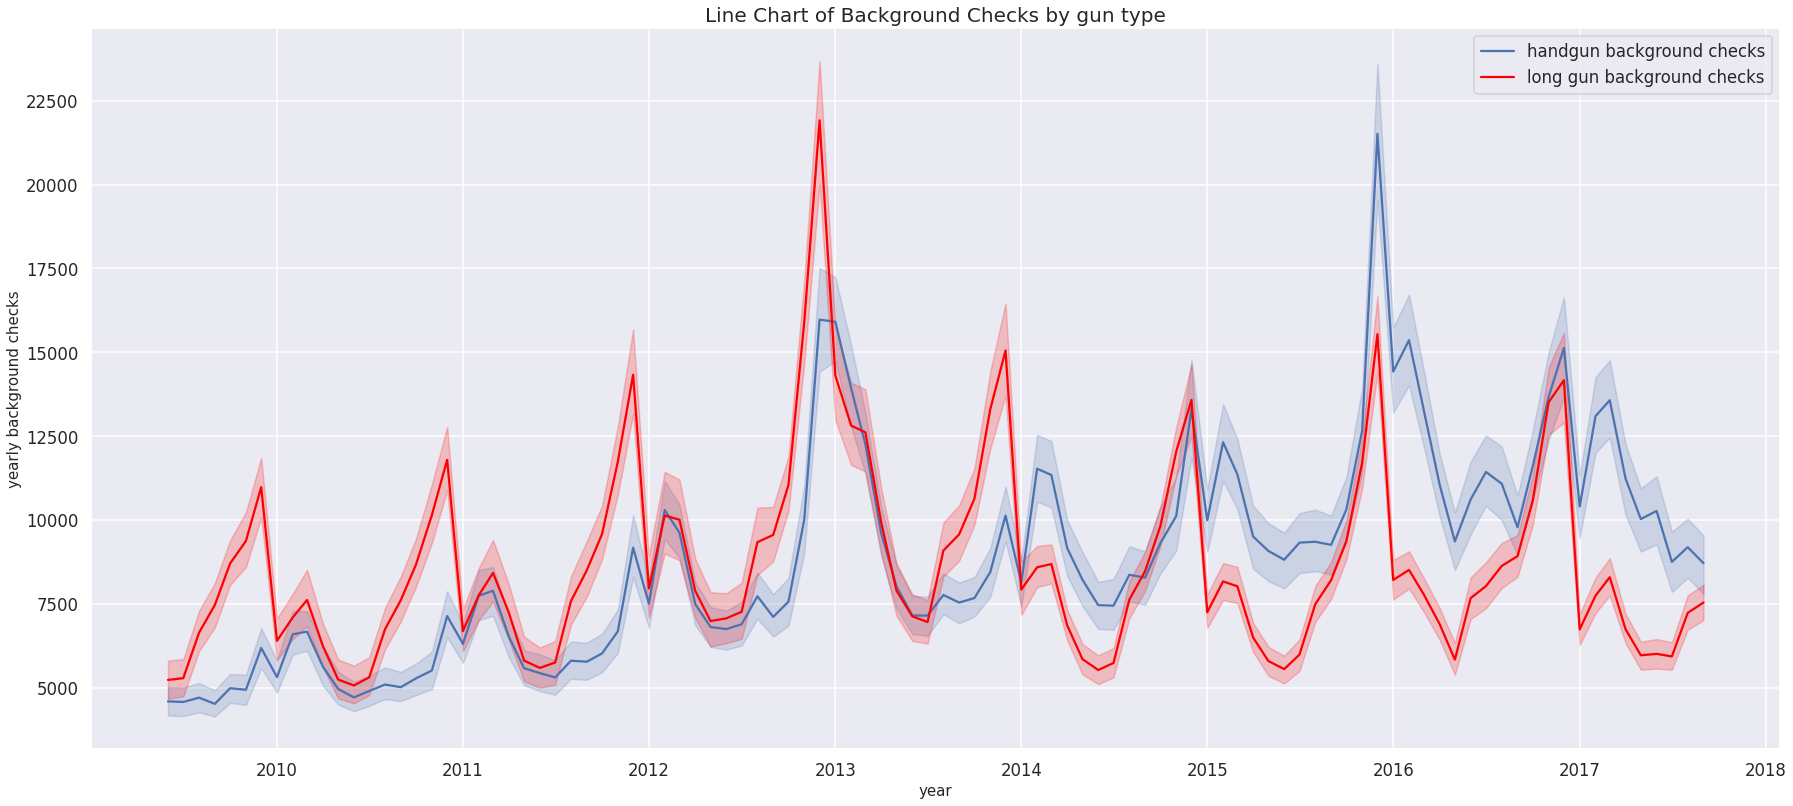

In [ ]:
# Plotting handgun and longgun background checks with time
sns.set(rc={'figure.figsize':(30.27,13.27)}) # set figure size
sns.set_theme(context='talk') # set graph theme
sns.lineplot(x="month", y='7year_rolling_avg_handgun', data=gun_background_check, label='handgun background checks')
sns.lineplot(x="month", y='7year_rolling_avg_longgun', data=gun_background_check, label="long gun background checks", color='red')
plt.xlabel("year", size=15)
plt.ylabel("yearly background checks", size=15)
plt.title("Line Chart of Background Checks by gun type", size=20)


Largest peak background check numbers are around 2013 for longguns and 2015 for handguns. it might be interesting to know which states have these peaks and what polices/events where going on around that time, but thats not in the scope this analysis. So, need to look at how state's background check numbers vary by gun type 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Average Background Check by State and Gun Type')

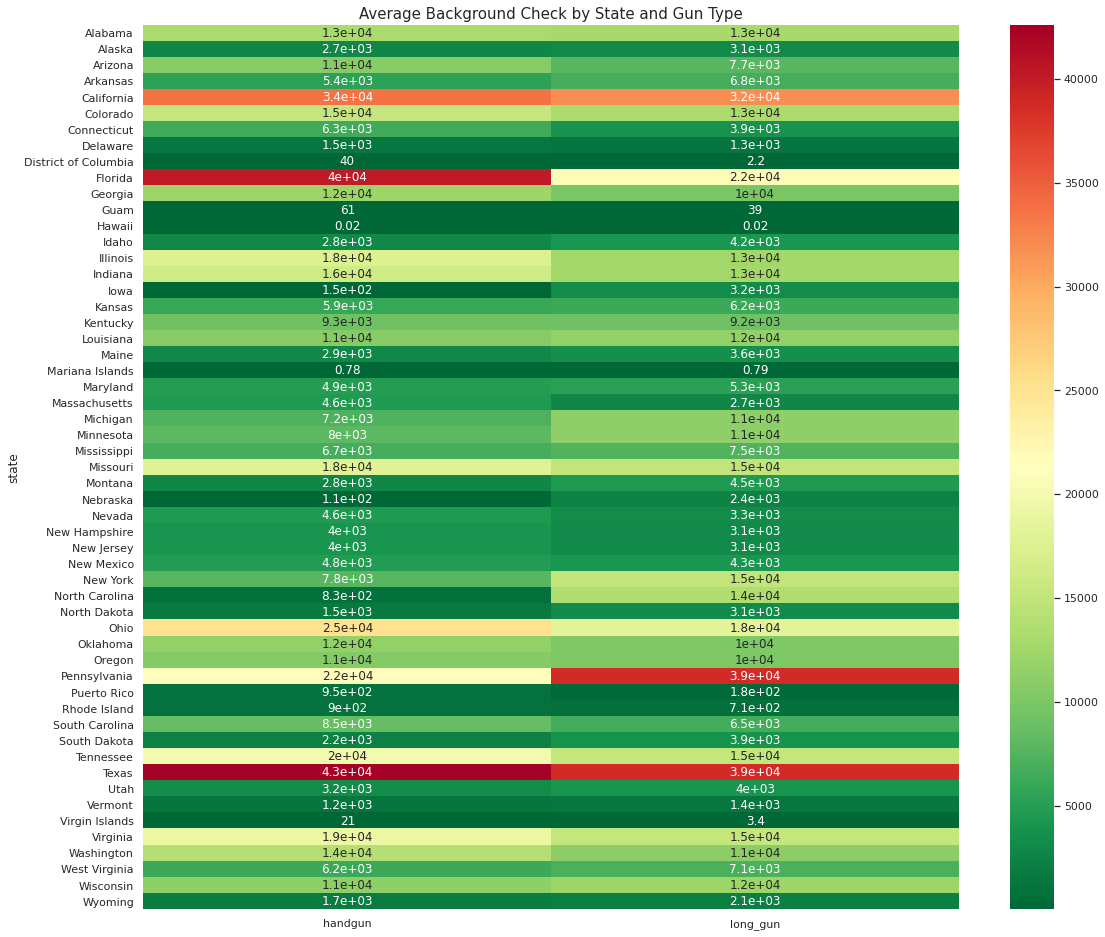

In [ ]:
sns.set(rc={'figure.figsize':(18.27,16.27)}) 

sns.heatmap(gun_background_check.groupby('state') \
['handgun','long_gun'].agg('mean'),cmap='RdYlGn_r',annot=True);
plt.title("Average Background Check by State and Gun Type", size=15)

The mean values in regards to handguns and longguns are:

1.   Texas
2.   Pensivania 
3.   Florida 
2.   California 

It's nice to know the top states that have the highest number of background checks, this could be an indication of states that have a higher gun population or sales

Yet, more detail can be taken from actual guns used in mass shooting incidents complied by Standford.



---



### What number of states have the highest number of mass shooting evens and for which type of gun?


Text(0.5, 1.0, 'Bar Chart of Nmber of Gun Types in Mass Shootings')

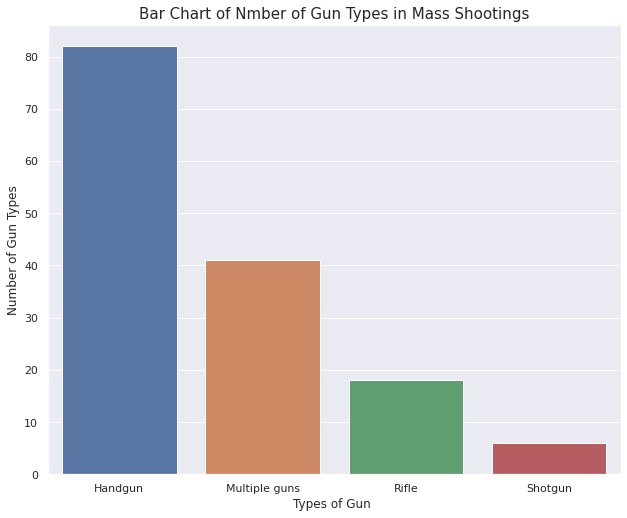

In [ ]:
# Plot the type of gun
sns.set(rc={'figure.figsize':(10.27,8.27)})
sns.barplot(x=mass_shootings['Type of Gun - General'].value_counts().index, y=mass_shootings['Type of Gun - General'].value_counts())
plt.xlabel("Types of Gun ", size=12)
plt.ylabel("Number of Gun Types", size=12)
plt.title("Bar Chart of Nmber of Gun Types in Mass Shootings", size=15)


Above it is shown that single handguns are involved in the most amount of mass shooting incidents -- around 80, multiple guns, rifles, then shotguns.

The heatmap below is a graph of the mean of the number of handguns in the handgun category and multiple handgun categories

Text(0.5, 1.0, 'Heat Map of Sum of Gun Types Verusu States')

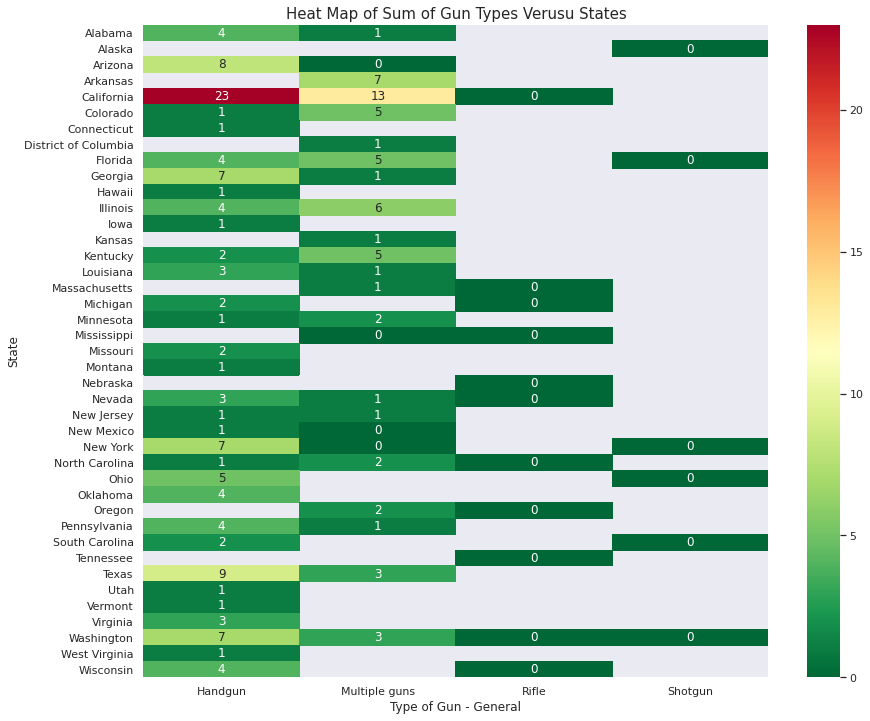

In [ ]:
plt.figure(figsize=[14,12])

sns.heatmap(mass_shootings.groupby(['State','Type of Gun - General']) \
['Number of Handguns'].agg('sum').unstack('Type of Gun - General'),cmap='RdYlGn_r',annot=True)
plt.title("Heat Map of Sum of Gun Types Verusu States", size=15)

The heatmap above is a graph of the mean number of gun types.

Looks like California has the highest number of handgun mass shooting with a handgun, but this is also seen in the multiple guns category as well followed by Texas, Arizona, Georgia and washington.

It's known that handguns are in the most mass shootings(which can include the multiple gun category) based on the standford database.

So from the graph it can be seen that handguns are first, followed by multiple 
guns, rifles and shotguns yet from a gun regulation standpoint, it would be helpful to have more detail in regards to type of guns used. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Heat Map of Auto/Semi Automatics Versus Gun Type')

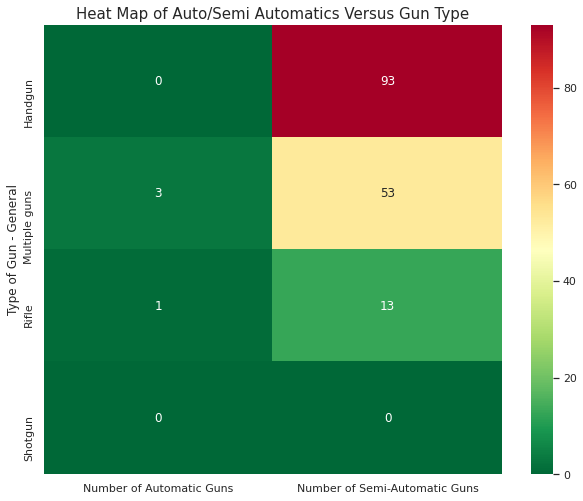

In [ ]:
sns.heatmap(mass_shootings.groupby('Type of Gun - General') \
['Number of Automatic Guns', 'Number of Semi-Automatic Guns'].agg('sum'),cmap='RdYlGn_r', annot=True);
plt.title("Heat Map of Auto/Semi Automatics Versus Gun Type", size=15)

As you can see from the heatmap above, most semi-automatic guns involved in mass shootings -- according to data collected by Standford -- are handguns as well as some multiple guns(which can include handguns) and very few incidents of automatic weapons.

###What are the Most Common Motives by Gun type?

Text(0.5, 0, 'Number of Mass Shooting Incidents')

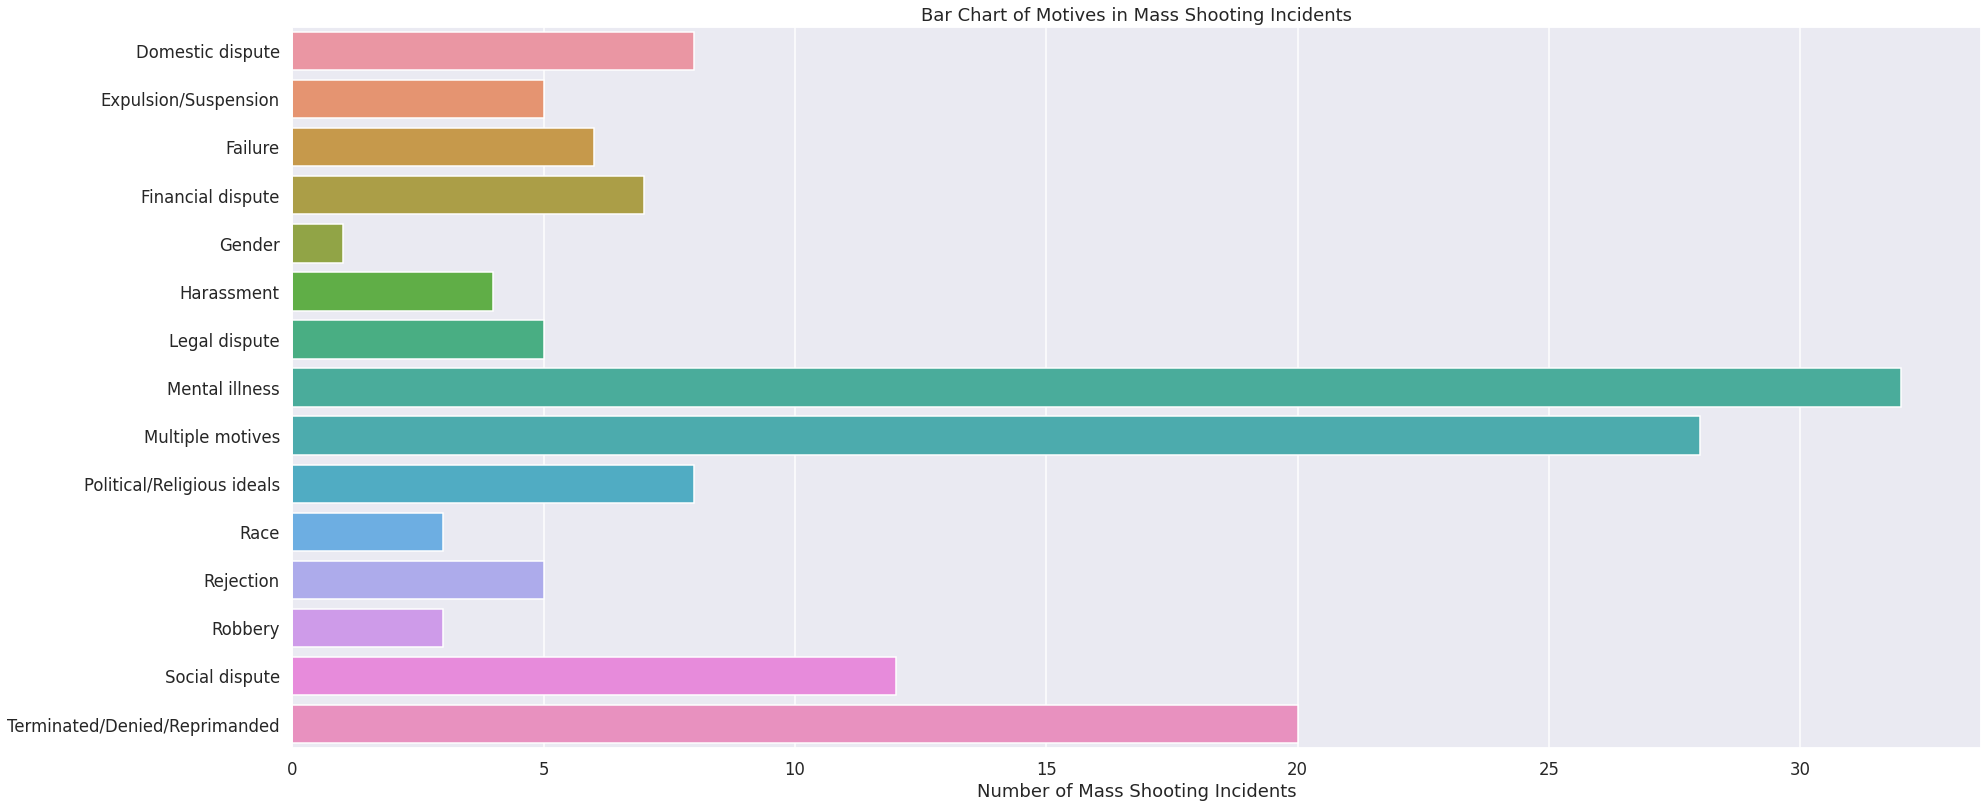

In [ ]:
# PLot the type of gun
sns.barplot(y=mass_shootings['Possible Motive - General'].value_counts().index, x=mass_shootings['Possible Motive - General'].value_counts(), data=mass_shootings)
plt.xticks(horizontalalignment="center")
plt.title("Bar Chart of Motives in Mass Shooting Incidents")
plt.xlabel('Number of Mass Shooting Incidents')

Looks like mental illness is the top causes with multiple causes in second, yet mental illness it more a concern when it comes to gun safety -- even background checks. It would be nice to know which motives were linked to a certain type of gun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Heat Map of Motive Verusu Gun Type')

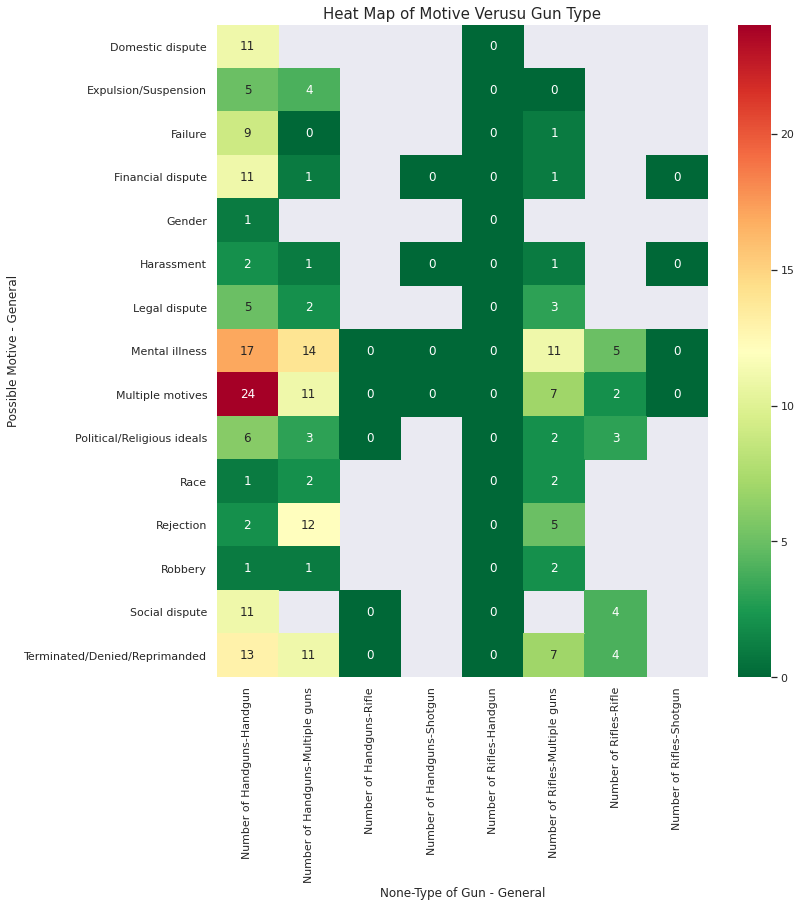

In [ ]:
plt.figure(figsize=[11,12])

sns.heatmap(mass_shootings.groupby(['Type of Gun - General','Possible Motive - General']) \
['Number of Handguns','Number of Rifles'].agg('sum').unstack('Type of Gun - General'),cmap='RdYlGn_r',annot=True)
plt.title("Heat Map of Motive Verusu Gun Type", size=15)

Looks like the number handguns and multiple guns used mass shootings are used by people with mental illness, multiple guns, or various disputes as seem in the heat map above.

**bold text**<a id='conclusions'></a>
# Conclusions

The goal of this project was to look at data trends of specific type of gun backround checks and features of the mass shooting database in regards type, number and motive of various gun background checks as a starting point for further exploration. No statistial methods were used in this analysis.

For the backgroung check data trends with time, there are peaks in 2013 and 2016 as seen in the graph below:

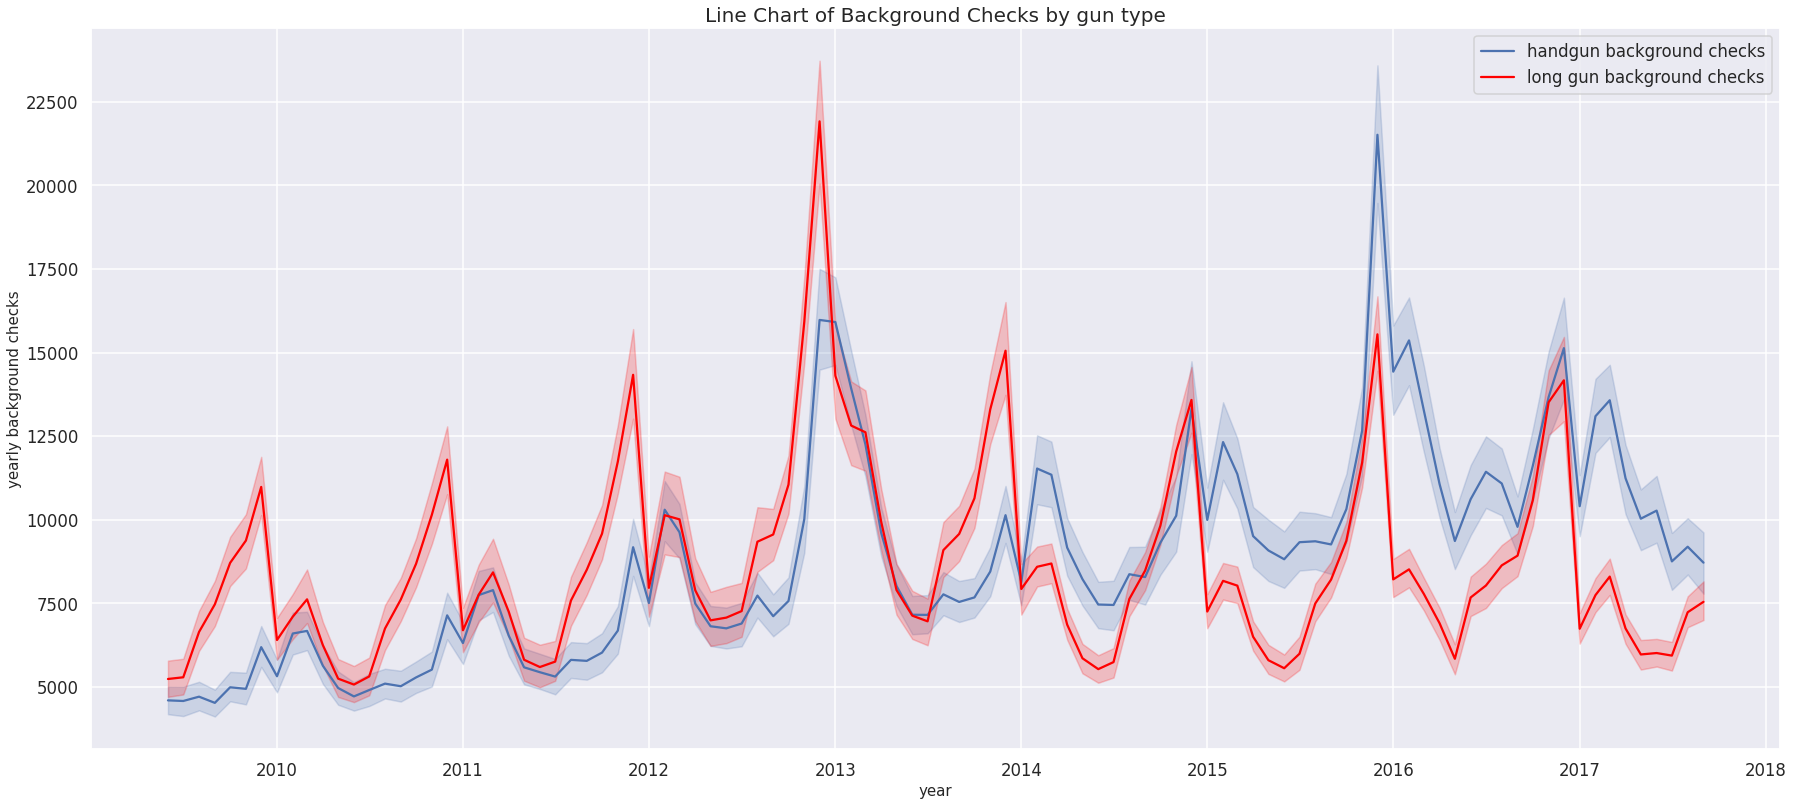



From the graph above we can observe the highest peak values at 2013 and 2016. It unknown from the data what may of caused these spikes. Yet, one factor could be policy changes such as the assault weapons ban in 2016, but investigating this is beyond the scope of the project

Next made a heatmap of the mean of gun background checks by state and type

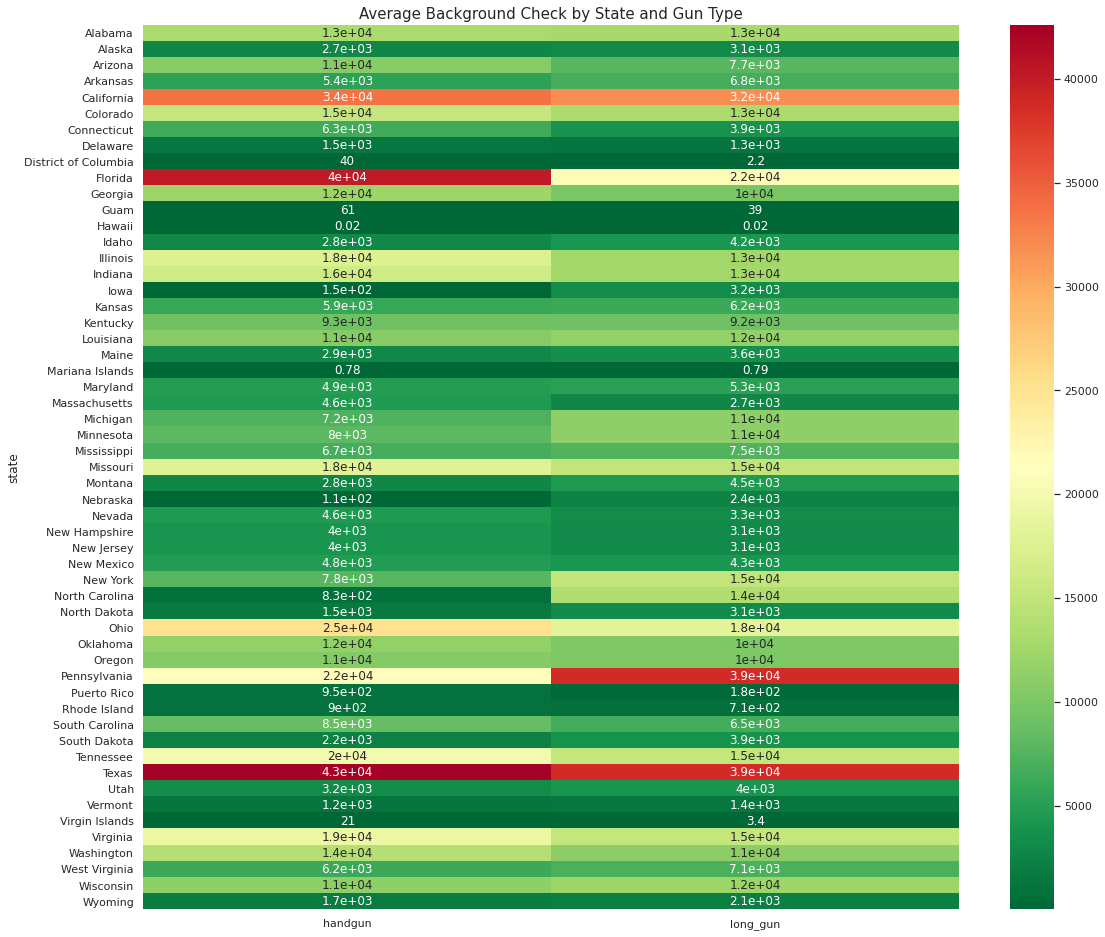

the highest ones are California, Florida, Texas and Pennsuvania.


Next, explored the mass shooting data set and it was found out that handguns and multpile guns have the highest use in the mass shootings database using a bar graph and a heat map, California had the highest number of mass shootings using handguns. Also, that number of semi-automatic handguns(93) and multiple guns(53) were the most used, while only 4 automatic weapons were used.

In the motives section it was found that mental illness and multiple motives were found be with the highest number of shooting incidents, and specifically with use with handgus and multiple guns(as seen in the bar chart and heat map)





---



Since no statistics were used, no meaniful conparison with variables can be drawn. Yet, this exploration does start to paint a picture of types of guns, trends and characteristics seen in FBI background check data and the Standford mass shooting databases. 